# Traffic Congestion - Data Exploration

## A. Hypothesis

### *Probable causes for Trend Component*
1. With increase in time, the population of the area will probably increase. Hence, an **upward trend** can be expected in the traffic flow as the time goes by.

### *Probable causes for Seasonality Component*
2. The road traffic flow will dependent on the different hours of the day (rush hours vs off hours). Hence, **daily seasonality** can be expected.
3. The road traffic flow on weekdays will be greater than weekends. Hence **weekly seasonality** can be expected.
4. The road traffic flow will dependent on the different months of the year, due to change in weather conditions. Hence **annual seasonality** can be expected.

>### *Probable Outliers*
>1. Even if its a weekday, on national holidays road traffic flow will be different.
>2. On account of road accidents / road repairs / natural calamities, the road traffic flow will be different.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

### Import Data
Since this just a time series analysis, no test-train data splitting is being performed.

In [2]:
data = pd.read_csv('data/a40_new.csv')
features = list(data.columns)

# Converting str timestamps to pd.Timestamp
data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y')

# Previewing different aspects of the data
#print('Features of the Dataset:\n\n', features)
#print('\nData Type of different Features:\n\n', data.dtypes)
data.head()

,LinkRef,LinkDescription,Date,TimePeriod,AverageJT,AverageSpeed,DayType,LinkLength,Flow
0,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:00:00,270.88,101.80,14,7.66,4.0
1,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:15:00,303.63,90.82,14,7.66,3.0
2,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:30:00,318.10,86.69,14,7.66,14.0
3,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,00:45:00,323.02,85.37,14,7.66,11.0
4,AL2471,A40 between A4137 and A49 (AL2471),2010-01-01,01:00:00,260.15,106.00,14,7.66,8.0


In [3]:
numberOfDays = len(data.Date.unique())
print("Total number of Days: ", numberOfDays)
timePeriods = len(data.TimePeriod.unique())
print("Total number of TimePeriods: ", timePeriods)

Total number of Days:  1826
Total number of TimePeriods:  96


### Feature Description
- Date : The timestamp for a given day.
- TimePeriod : Each day is split into 96 time slices at an interval of 15 minutes ((24*60)/96 = 15).
- AverageJT : The average time taken (in seconds) by the vehicles that traveled the road from start to end within each TimePeriod.
- AverageSpeed : The average speed of the vehicles (in km/hr) that traveled the road from start to end within each TimePeriod.
- LinkLength : The distance of the road in kilometers.
- Flow : The number of vehicles that passed through the road in each period of 15 minutes.
- LinkRef / LinkDescription : These are constant and give information about the road. We will ignore.


### Timeseries Plot - Observations vs Vehicle Count
A simple line plot of all the observations.

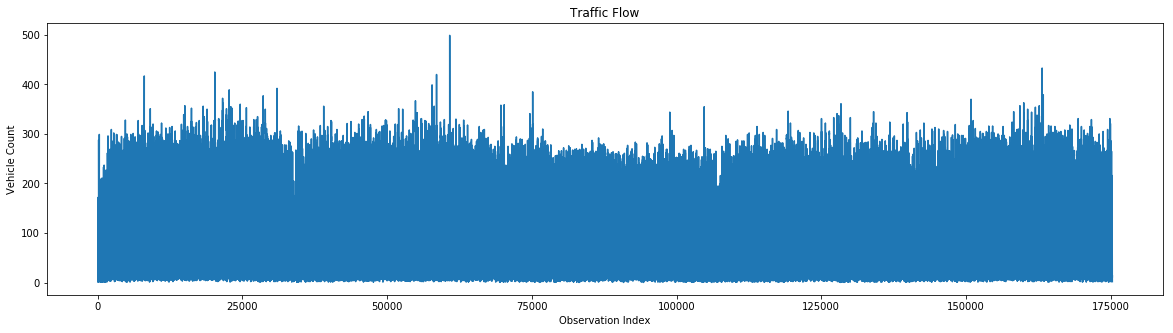

In [4]:
plt.figure(figsize=(20,5))
plt.plot(data.index, data['Flow'])
plt.title('Traffic Flow')
plt.xlabel('Observation Index')
plt.ylabel('Vehicle Count');
plt.show(block=False)

**Observation:**
- No trend can be identified.
- No seasonality can be identified.

**Conclusion:**
- Further analysis required.

## B. Hypothesis Testing


### 1. Verifying Traffic Flow Trend
**Claim:** With increase in time, the population of the area will probably increase. Hence, an **upward trend** can be expected in the traffic flow as the time goes by.

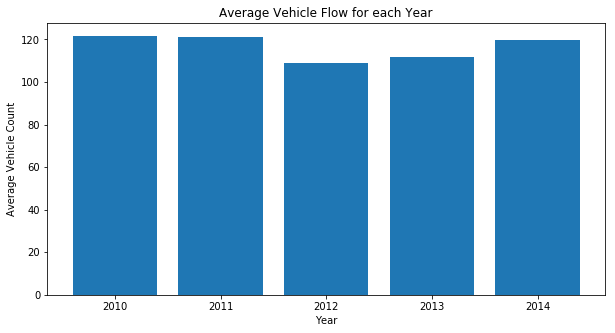

In [5]:
avgAnnualData = data[['Flow']]
avgAnnualData['Year'] = data['Date'].apply(lambda x: datetime.strftime(x, '%Y'))
avgAnnualData = avgAnnualData.groupby('Year', as_index=False).mean()

plt.figure(figsize=(10,5))
plt.bar(avgAnnualData['Year'], avgAnnualData['Flow'])
plt.title('Average Vehicle Flow for each Year')
plt.xlabel('Year')
plt.ylabel('Average Vehicle Count');
plt.show(block=False)

**Obervation:**
- The average annual traffic flow data is showing mixed trends. 
- For the first two years it is stationary. For the last three years its showing a rising trend.

**Conclusion:** 
- The hypothesis cannot be proved true for the given case.

### 2. Verifying Daily Seasonality
**Claim:** The road traffic flow will dependent on the different hours of the day (rush hours vs off hours). Hence, **daily seasonality** can be expected.

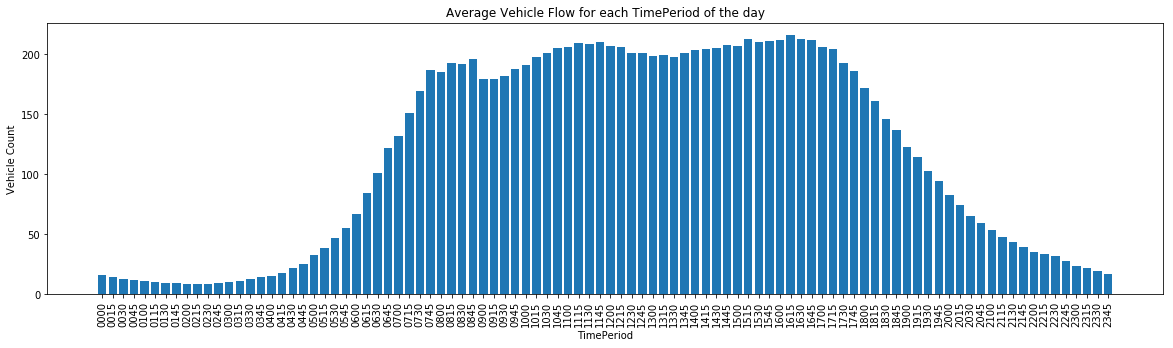

In [6]:
# Converting the list of TimePeriod into HHMM 24-hr format
timeList = [datetime(2010, 1, 1, 0) + timedelta(minutes=15*x) for x in range(0, timePeriods)]
timeList=[x.strftime('%H%M') for x in timeList]

avgTimePeriodData = data[['TimePeriod', 'Flow']]
avgTimePeriodData = avgTimePeriodData.groupby('TimePeriod', as_index=False).mean()

plt.figure(figsize=(20,5))
plt.bar(avgTimePeriodData['TimePeriod'], avgTimePeriodData['Flow'])
plt.xticks(np.arange(0,96), timeList, rotation='vertical')
plt.title('Average Vehicle Flow for each TimePeriod of the day')
plt.xlabel('TimePeriod')
plt.ylabel('Vehicle Count');
plt.show(block=False)

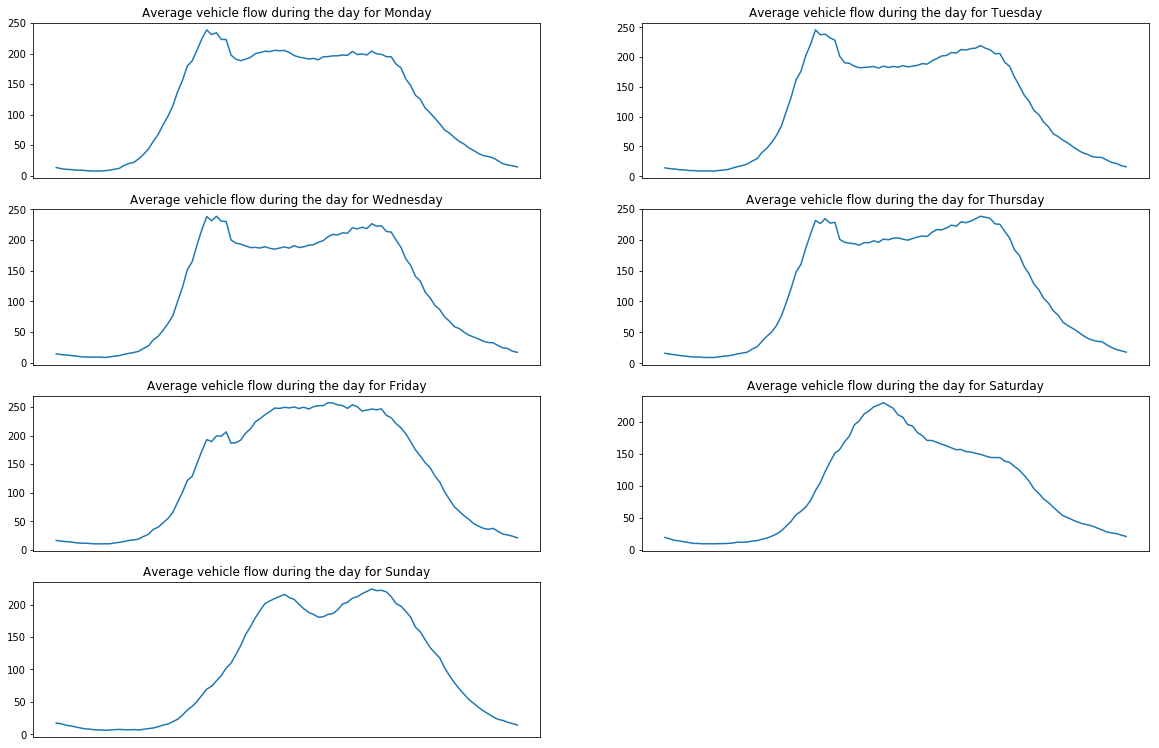

In [7]:
dayList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekDayWiseAvgTPData = data[['TimePeriod', 'Flow']]
weekDayWiseAvgTPData['Day'] = data['Date'].apply(lambda x: datetime.strftime(x, '%A'))
weekDayWiseAvgTPData = weekDayWiseAvgTPData.groupby(['Day', 'TimePeriod'], as_index=False).mean()

fig = plt.figure(figsize=(20,20))
fig.tight_layout()
for i in range(7):
    dataWeekly = weekDayWiseAvgTPData[weekDayWiseAvgTPData['Day'] == dayList[i]] # select dataframe with month = i
    ax = fig.add_subplot(6,2,i+1) # add subplot in the i-th position on a grid 12x1  
    ax.title.set_text('Average vehicle flow during the day for '+ dayList[i])
    ax.plot(dataWeekly['TimePeriod'], dataWeekly['Flow'])
    #ax.set_xticks(dataWeekly['TimePeriod'].unique()) # set x axis
    ax.set_xticks([])
    #ax.tick_params(labelrotation=90)

**Observation**
- The first graph illustrates the average flow of traffic during different time intervals of the day for the entire dataset.
- The second graph illustrates the average flow of traffic during different time intervals of the day for the individual days of the week.
- The graph shape of average plot and plots for weekdays are similar.
- The graph shape for average plot and plots for weekends are not similar

**Conclusion:**
- It can be concluded that there is a **daily seasonality** in the data as similar patterns can be observed in traffic frequency for particular time intervals.
- The rush hours for weekdays are around 11:45 in the morning and 16:15 in the evening.

### 3. Verifying Weekly Seasonality
**Claim:** The road traffic flow on weekdays will be greater than weekends. Hence **weekly seasonality** can be expected.

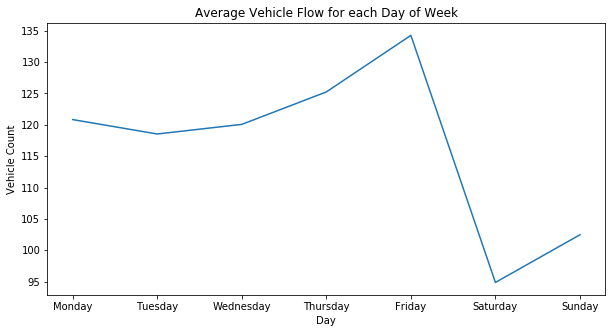

In [8]:
avgDayOfWeekData = data[['Flow']]
avgDayOfWeekData['Day'] = data['Date'].apply(lambda x: x.weekday())#datetime.strftime(x, '%A'))
avgDayOfWeekData = avgDayOfWeekData.groupby(['Day'], as_index=False).mean()
avgDayOfWeekData['Day'] = avgDayOfWeekData['Day'].apply(lambda x: dayList[x])

plt.figure(figsize=(10,5))
plt.plot(avgDayOfWeekData['Day'], avgDayOfWeekData['Flow'])
plt.xticks(np.arange(0,7), dayList, rotation='horizontal')
plt.title('Average Vehicle Flow for each Day of Week')
plt.xlabel('Day')
plt.ylabel('Vehicle Count');
plt.show(block=False)

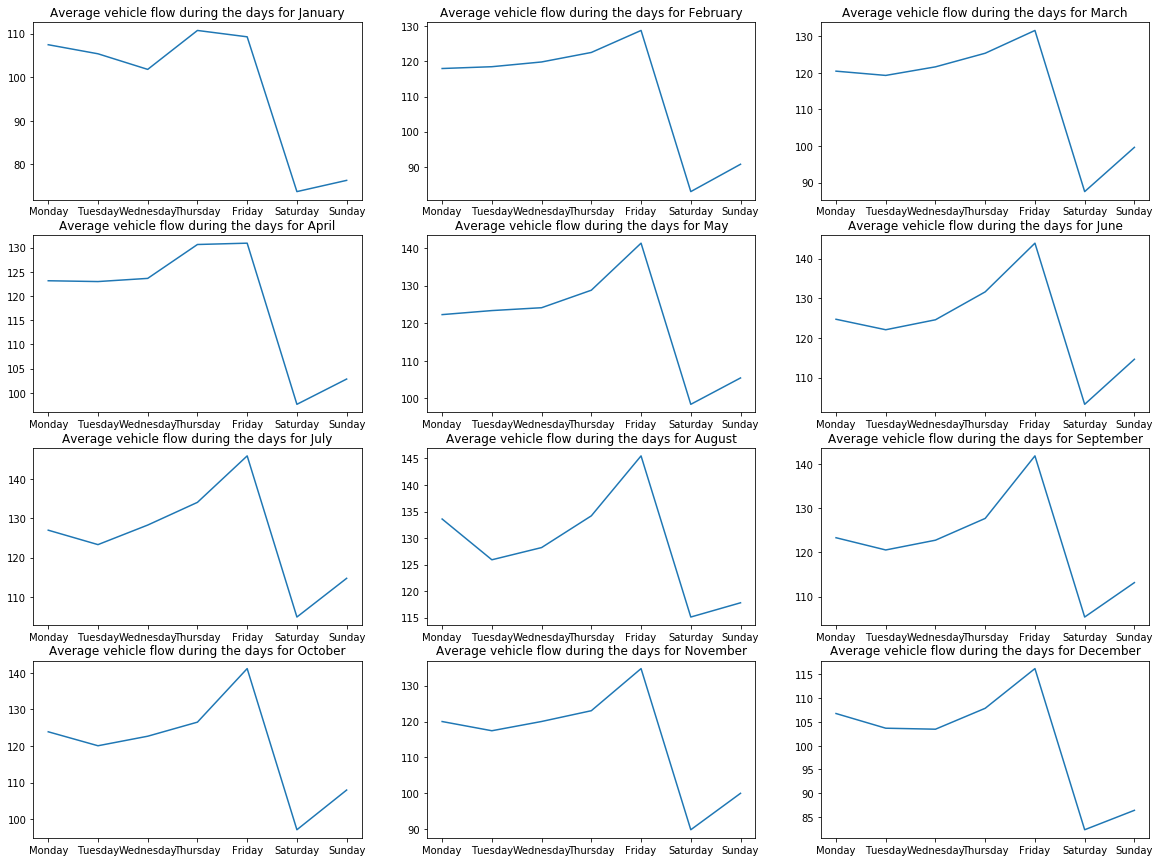

In [9]:
monthNumList = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
monthList= ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

mthWiseAvgDayOfWeekData = data[['Flow']]
mthWiseAvgDayOfWeekData['Day'] = data['Date'].apply(lambda x: x.weekday())#datetime.strftime(x, '%A'))
mthWiseAvgDayOfWeekData['Month'] = data['Date'].apply(lambda x: datetime.strftime(x, '%m'))
mthWiseAvgDayOfWeekData = mthWiseAvgDayOfWeekData.groupby(['Month','Day'], as_index=False).mean()
mthWiseAvgDayOfWeekData['Day'] = mthWiseAvgDayOfWeekData['Day'].apply(lambda x: dayList[x])

fig = plt.figure(figsize=(20,15))
fig.tight_layout()
for i in range(12):
    dataMonthly = mthWiseAvgDayOfWeekData[mthWiseAvgDayOfWeekData['Month'] == monthNumList[i]] # select dataframe with month = i
    ax = fig.add_subplot(4,3,i+1) # add subplot in the i-th position on a grid 12x1  
    ax.title.set_text('Average vehicle flow during the days for '+ monthList[i])
    ax.plot(dataMonthly['Day'], dataMonthly['Flow'])
    ax.set_xticks(dataMonthly['Day'].unique()) # set x axis
    #ax.set_xticks([])
    #ax.tick_params(labelrotation=45)

**Observation**
- The first graph illustrates the average flow of traffic during different days of week for the entire dataset.
- The second graph illustrates the average flow of traffic during different days of the week for the individual months.
- The graph shape of average plot and monthly plots are similar.

**Conclusion:**
- It can be safely concluded that there is a **weekly seasonality** in the data as similar patterns can be observed in traffic frequency for each week at a monthly scale.
- The weekdays have more traffic with the highest reaching on Friday. The weekends have lesser traffic.

### 4. Verifying Annual Seasonality
**Claim:** The road traffic flow will dependent on the different months of the year, due to change in weather conditions. Hence **annual seasonality** can be expected.

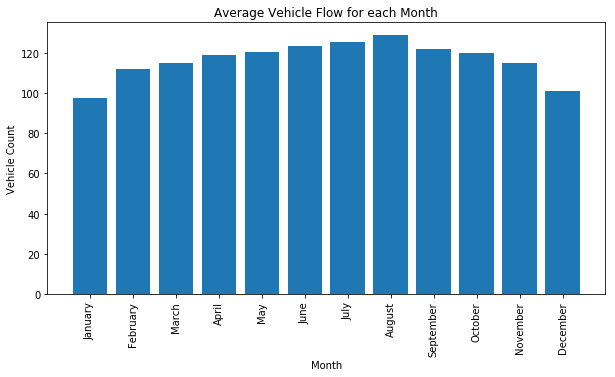

In [10]:
monthWiseAvgData = data[['Flow']]
monthWiseAvgData['Month'] = data['Date'].apply(lambda x: datetime.strftime(x, '%m'))
monthWiseAvgData = monthWiseAvgData.groupby(['Month'], as_index=False).mean()

plt.figure(figsize=(10,5))
plt.bar(monthWiseAvgData['Month'], monthWiseAvgData['Flow'])
plt.xticks(np.arange(0,12), monthList, rotation='vertical')
plt.title('Average Vehicle Flow for each Month')
plt.xlabel('Month')
plt.ylabel('Vehicle Count');
plt.show(block=False)

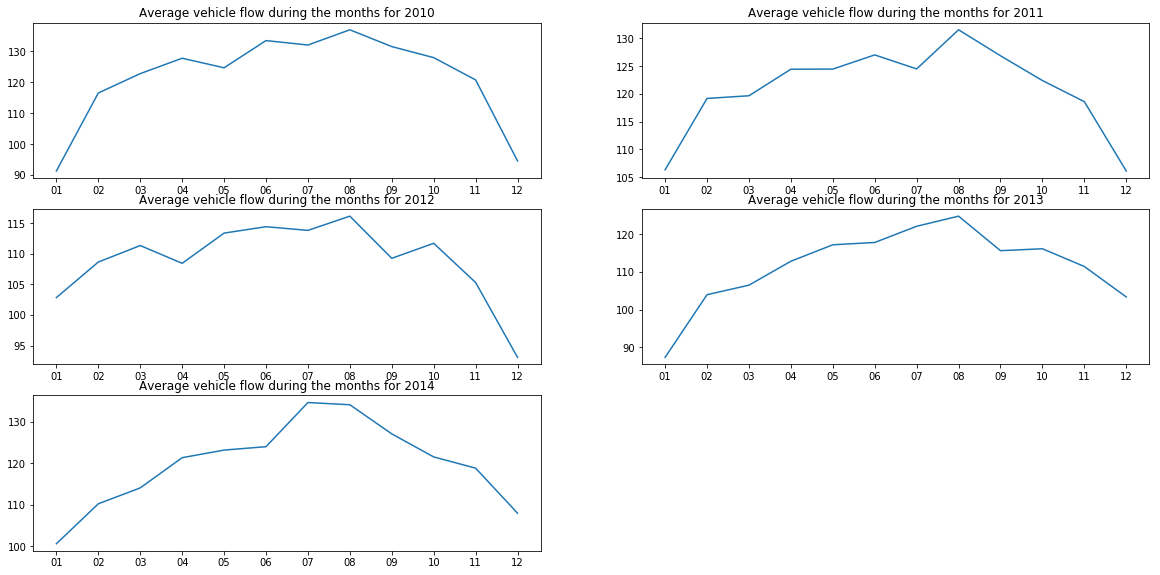

In [11]:
yearList = ['2010','2011','2012','2013','2014']
monthWisePerYearAvgData = data[['Flow']]
monthWisePerYearAvgData['Month'] = data['Date'].apply(lambda x: datetime.strftime(x, '%m'))
monthWisePerYearAvgData['Year'] = data['Date'].apply(lambda x: datetime.strftime(x, '%Y'))
monthWisePerYearAvgData = monthWisePerYearAvgData.groupby(['Year', 'Month'], as_index=False).mean()

fig = plt.figure(figsize=(20,20))
fig.tight_layout()
for i in range(5):
    dataYearly = monthWisePerYearAvgData[monthWisePerYearAvgData['Year'] == yearList[i]] # select dataframe with month = i
    ax = fig.add_subplot(6,2,i+1) # add subplot in the i-th position on a grid 12x1  
    ax.title.set_text('Average vehicle flow during the months for '+ yearList[i])
    ax.plot(dataYearly['Month'], dataYearly['Flow'])
    ax.set_xticks(dataYearly['Month'].unique()) # set x axis
    #ax.set_xticks([])
    #ax.tick_params(labelrotation=90)

**Observation**
- The first graph illustrates the average flow of traffic during different months for the entire dataset.
- The second graph illustrates the average flow of traffic during different months for each year.
- The graph shape of average plot and yearly plots are similar.

**Conclusion:**
- It can be safely concluded that there is a **annual seasonality** in the data as similar patterns can be observed in traffic frequency for each month at an yearly scale.
- The average traffic flow rises till August and then decreases till December-January.

In [12]:
'''
# Function to plot the average daily data
#dataTS.reset_index(level=0, inplace=True)
#dataTS['Date'] = dataTS['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
#dataTS.groupby(dataTS.index).mean()
avgDailyData = data[['Date', 'Flow']]
avgDailyData = avgDailyData.groupby('Date').mean()
def plotDailyAvg(avgDailyData):
    plt.figure(figsize=(20,5))
    plt.plot(avgDailyData)
    plt.title('Average Daily Vehicle Flow')
    plt.xlabel('Date')
    plt.ylabel('Vehicle Count');
    plt.show(block=False)
    # data.groupby('Date')['Flow'].mean().plot.line(figsize=(20,5))
'''

"\n# Function to plot the average daily data\n#dataTS.reset_index(level=0, inplace=True)\n#dataTS['Date'] = dataTS['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))\n#dataTS.groupby(dataTS.index).mean()\navgDailyData = data[['Date', 'Flow']]\navgDailyData = avgDailyData.groupby('Date').mean()\ndef plotDailyAvg(avgDailyData):\n    plt.figure(figsize=(20,5))\n    plt.plot(avgDailyData)\n    plt.title('Average Daily Vehicle Flow')\n    plt.xlabel('Date')\n    plt.ylabel('Vehicle Count');\n    plt.show(block=False)\n    # data.groupby('Date')['Flow'].mean().plot.line(figsize=(20,5))\n"

## C. Determining Stationarity of the Timeseries
### Conditions for Stationarity of Time Series
- The **mean** of the timeseries shouldn't be a function of time. It should be constant i.e. no rising or falling trend should be visible.
- The **variance** of the timeseries (vertical spread of TS plot) shouldn't be a function of time. (Homoscedasticity).
- The **covariance** of the i th term and (i+1)th term (Horizontal spread of TS) shouldn't be a function of time.

### Dicky Fuller Test
> - **Null-Hypothesis of the Dickey-Fuller test states that the timeseries is non-stationary (presence of unit root).**
> - **Alternate Hypothesis of Dickey-Fuller test states that the times series is stationary (absence of unit root).**

**For further analysis and processes we will perform the operations on a 3 month subset of data in dataframe 'dataTS'. This will help us by easing the visual interpretation of the plots.**

In [13]:
# Preparing data for stationarity test
# Combining 'Date' and 'Timeperiod' into a single Timestamp
dataTS_Full = data[['Date', 'Flow']]
dataTS_Full['Date'] = dataTS_Full['Date'].apply(lambda x: datetime.strftime(x, '%d-%m-%Y'))
dataTS_Full['Date'] = dataTS_Full['Date'] + ' ' + data['TimePeriod']
dataTS_Full['Date'] = dataTS_Full['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M:%S'))
dataTS_Full = dataTS_Full.rename(columns={'Date':'Timestamp'})
dataTS_Full = dataTS_Full.set_index('Timestamp')

# Converting the dataTS_Full df to series for Dickey-Fuller Test
dataTS_Full = dataTS_Full['Flow']


In [14]:
# Extracting the 3 month subset
dataTS = dataTS_Full['2010-01':'2010-03']
dataTS.describe()

count    8640.000000
mean      109.976157
std        86.432755
min         0.500000
25%        23.000000
50%        96.000000
75%       189.000000
max       417.000000
Name: Flow, dtype: float64

Results of Augmented Dickey-Fuller Test:
Test Statistic                                -26.380273
p-value                                         0.000000
#Lags Used                                     37.000000
Number of Observations Used                  8602.000000
Critical Value / Significance Level (1%)       -3.431110
Critical Value / Significance Level (5%)       -2.861876
Critical Value / Significance Level (10%)      -2.566949
dtype: float64


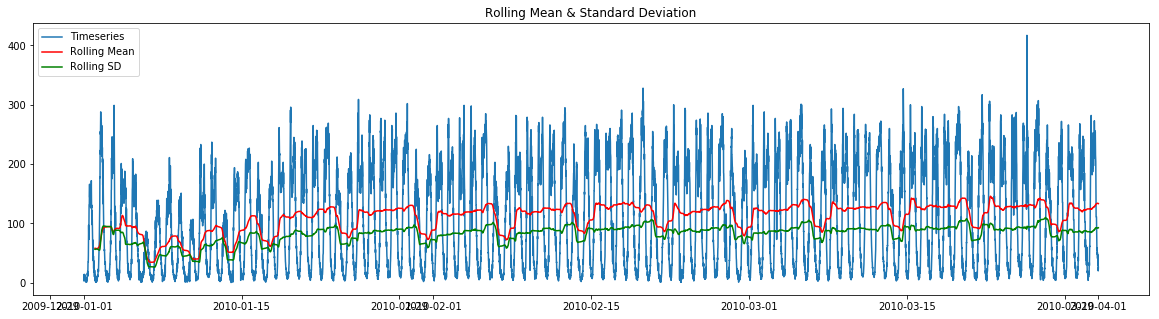

In [15]:
# Importing Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

# Defining the stationarity test function (Referred from Analytics Vidhya)
def stationarityTest(ts):
    # Calculating the Moving Mean or Moving Average
    rolMean = ts.rolling(96).mean()
    # Calculating the Moving Standard Deviation (Variance = SD^2)
    rolStd = ts.rolling(96).std()

    # Plotting rolMean and rolStd with the TimeSeries
    plt.figure(figsize=(20,5))
    plt.plot(ts, label='Timeseries')
    plt.plot(rolMean, color='red', label='Rolling Mean')
    plt.plot(rolStd, color='green', label='Rolling SD')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean & Standard Deviation')

    # Performing the Dickey-Fuller test
    print('Results of Augmented Dickey-Fuller Test:')
    # The adfuller function takes data in series dtype
    dfTest = adfuller(ts, autolag='AIC')
    dfOutput = pd.Series(dfTest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dfTest[4].items():
        dfOutput['Critical Value / Significance Level (%s)'%key] = value
    print(dfOutput)
    
# Performing the test on data
stationarityTest(dataTS)

**Observation**
- From visual inspection it can be roughly estimated that the timeseries seems stationary.
- The rolling mean and rolling standard deviation plots also appear to be constant.

**Inference**
- The p-value of 0 which is less than our 1% significance level value. This indicates that the null-hypothesis is invalid, with a certainity of 99%. Hence, timeseries is stationary.
- The Test Statistic is much lower than Critical Values. Hence the null-hypothesis can be rejected. Hence, timeseries is stationary.
- There is no need for applying any de-trending transformation or differencing the timeseries as it is stationary.

## D. Decomposition of Timeseries
### Checking Weekly timeseries by performing Dickey-Fuller on the decomposed residual
- Here we are performing a decomposition of the time series with a frequency interval of 1 week i.e. 96\*7 data points.
- This can help us in confirming whether weekly seasonality is affecting the stationarity of our time series.


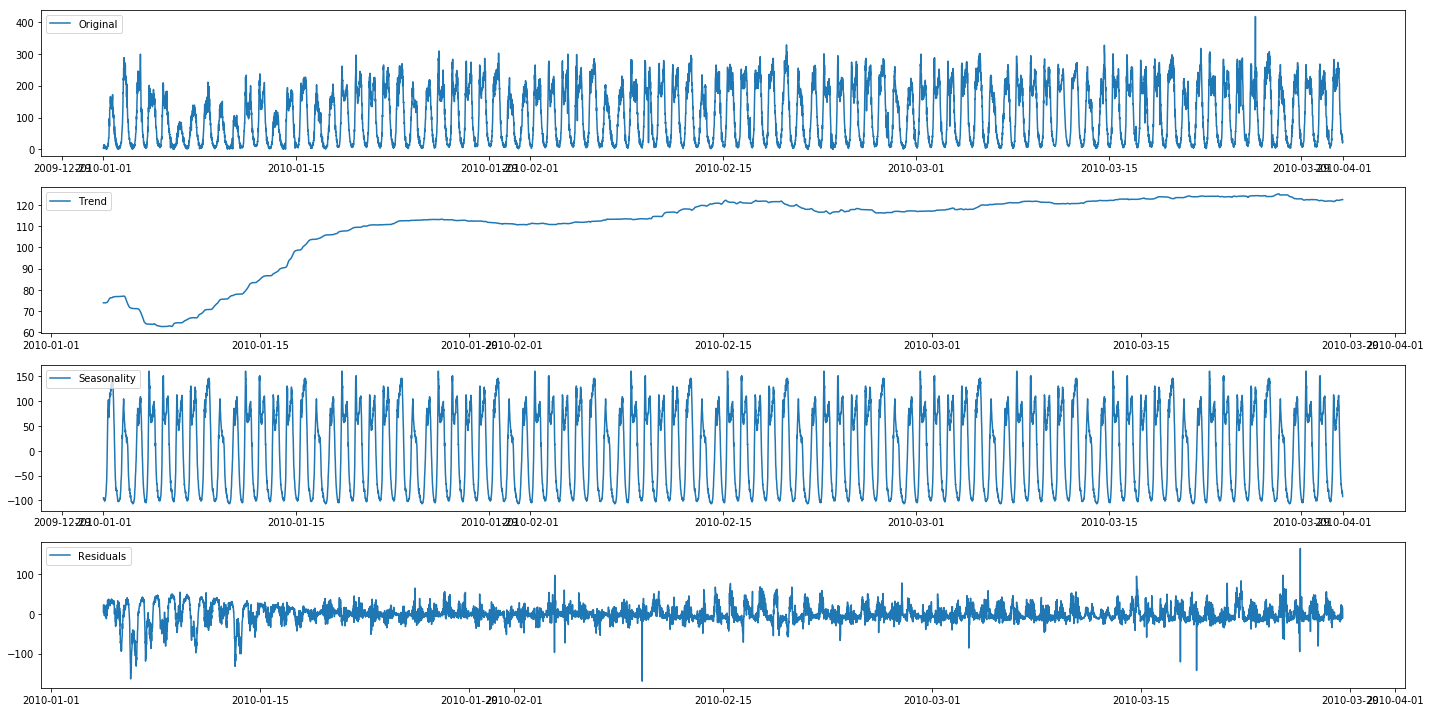

In [16]:
# Importing decomposition function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
# Performing decomposition for a frequency of 1 week.
decomposition = seasonal_decompose(dataTS, freq=96*7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(dataTS, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

Results of Augmented Dickey-Fuller Test:
Test Statistic                              -1.649934e+01
p-value                                      2.155886e-29
#Lags Used                                   1.100000e+01
Number of Observations Used                  7.956000e+03
Critical Value / Significance Level (1%)    -3.431172e+00
Critical Value / Significance Level (5%)    -2.861903e+00
Critical Value / Significance Level (10%)   -2.566963e+00
dtype: float64


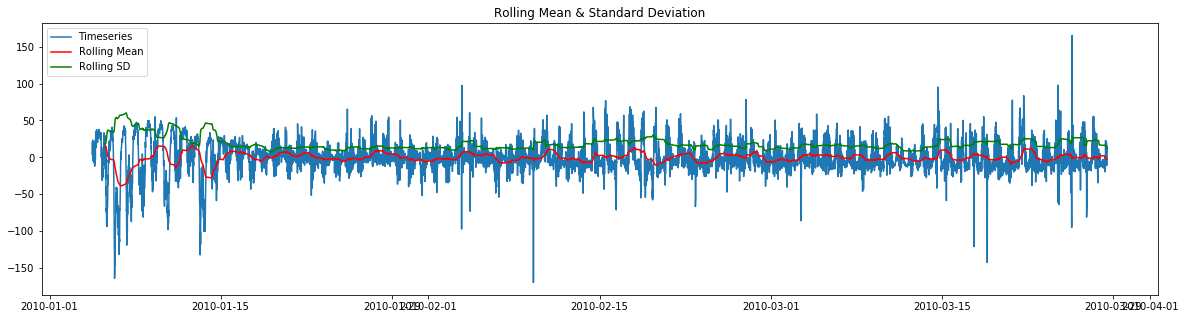

In [17]:
# Checking stationarity of the weekly frequency timeseries by decomposition
residual.dropna(inplace=True)
stationarityTest(residual)

**Inference**
- Even upon decomposition with frequency of 96*7, the test statistic is -16.49. Which is much lower than 1% significance level. Hence, we can conclude that the residual series is also stationary with 99% confidence.
- P-value of 2.155886e-29 also proves that the null hypothesis is invalid for weekly seasonality.

## E. Plotting ACF and PACF
We will use the best model out of AR, MA, ARMA and ARIMA models for forecasting in the modeling stage. So, in this section we will determine the various parameters that are required for the ARIMA model.
> - 'p' or the number of Auto-Regressive terms: These are the lags of forecasted variable
> - 'q' or the number of Moving-Average terms: These are the lagging forecasted error
> - 'd' or number of differences: This is the number of non seasonal differences

> - Autocorrelation Function (ACF): It is a measure of the correlation between the timeseries with a lagged version of itself. This will aid us in determining the value of 'q'.
> - Partial Autocorrelation Function: It is a measure of the correlation between the timeseries with a lagges version of itself but after eliminating the variations already explained by the intervening comparisons. This will aid us in determining the value of 'p'.

**A chart showing the right approach for choosing the AR and MA processes.**

||ACF|PACF|
|-|-|-|
|AR|Geometric|Significant till N-lags|
|MA|Significant till N-lags|Geometric|
|ARMA|Geometric|Geometric

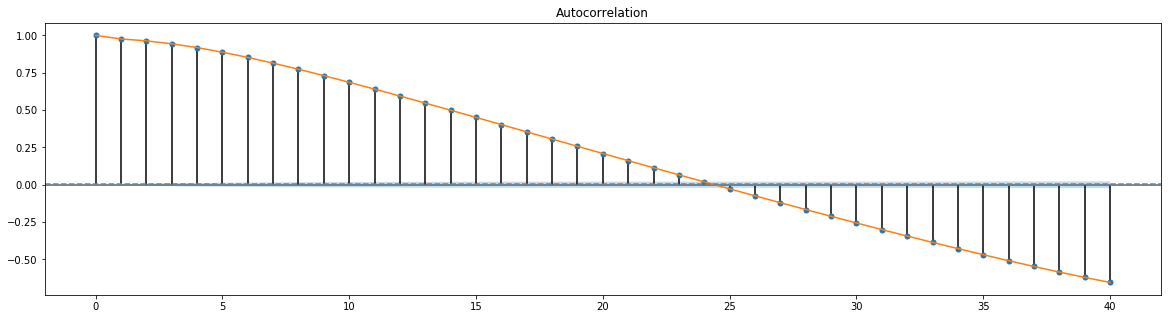

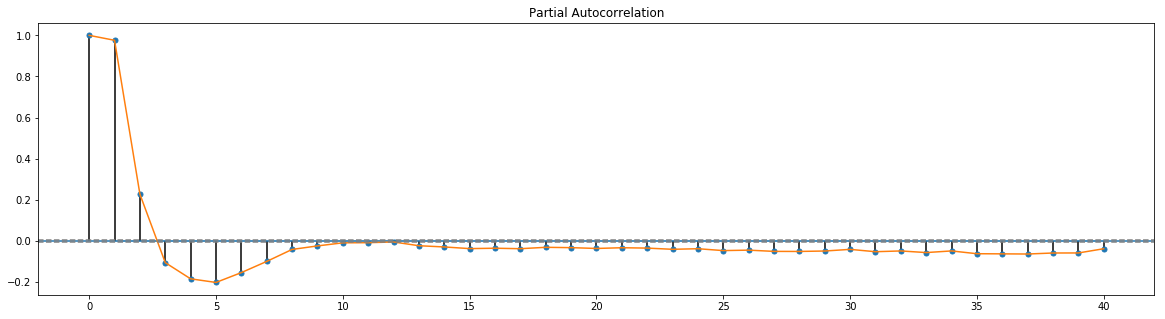

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def acf_pacf_plot(ts, lags):
    lagACF = acf(ts, nlags=lags)
    lagPACF = pacf(ts, nlags=lags, method='ols')
    
    plt.figure(figsize=(20,5))
    plot_acf(ts, ax=plt.gca(), lags=lags)
    plt.plot(lagACF)
    plt.axhline(y=-1.96/np.sqrt(len(ts.dropna())),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts.dropna())),linestyle='--',color='gray')
    
    plt.figure(figsize=(20,5))
    plot_pacf(ts, ax=plt.gca(), lags=lags, method='ols')
    plt.plot(lagPACF)
    plt.axhline(y=-1.96/np.sqrt(len(ts.dropna())),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts.dropna())),linestyle='--',color='gray')
acf_pacf_plot(dataTS_Full, 40)

- PACF is significant till 3 lags.
- ACF is geometric.

**Inference**
- The best model for this dataset is AR model with p=3.
- For modeling with ARIMA, following parameters can be used.

> - From the given PACF plot, we can determine that the value of 'p' is 3.
> - From the given ACF plot, we can determine that the value of 'q' is 24.